<a href="https://colab.research.google.com/github/arptoth/Kuzunshiji_MNIST/blob/master/Kuzunshiji_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognize Kuzunshiji japanese characters

![alt text](https://files.tofugu.com/articles/japanese/2012-01-25-hentaigana-history-of-japanese-writing-system/kuzushiji-strips.jpg)


# Download data

In [0]:
!pip install kaggle

In [0]:
!pip install ipython-autotime

%load_ext autotime

  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [0]:
from getpass import getpass

key = getpass('Enter token here')

#Set the enviroment variables
import os
os.environ['KAGGLE_USERNAME'] = "arpadtoth"
os.environ['KAGGLE_KEY'] = key
!kaggle datasets download -d anokas/kuzushiji



Enter token here··········
kuzushiji.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import zipfile

zip_ref = zipfile.ZipFile('kuzushiji.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import numpy as np # linear algebra

train_images = np.load('kmnist-train-imgs.npz')['arr_0']
test_images = np.load('kmnist-test-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

time: 415 ms


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

time: 220 ms


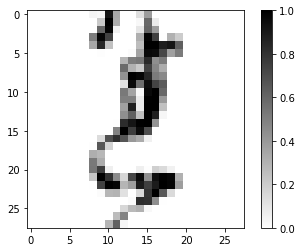

time: 244 ms


In [0]:
import matplotlib.pyplot as plt # plotting

plt.figure()
plt.imshow(train_images[0], cmap='binary')
plt.colorbar()
plt.grid(False)

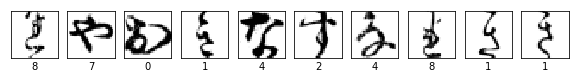

time: 458 ms


In [0]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

## Modelling

In [0]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



time: 2.87 ms


In [0]:
X_train_flat = train_images.reshape(60000, -1)
X_test_flat = test_images.reshape(10000,-1)

# Keras inputs
x_train = np.expand_dims(train_images, axis=-1)
x_test = np.expand_dims(test_images, axis=-1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

time: 16.3 ms


# Implementing CNN

In [0]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 12


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/12
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.4431 - acc: 0.8640 - val_loss: 0.3715 - val_acc: 0.8938
Epoch 2/12
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.1775 - acc: 0.9474 - val_loss: 0.2997 - val_acc: 0.9178
Epoch 3/12
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.1284 - acc: 0.9613 - val_loss: 0.2435 - val_acc: 0.9337
Epoch 4/12
60000/60000 [==============================] - 171s 3ms/sample - loss: 0.1080 - acc: 0.9674 - val_loss: 0.2416 - val_acc: 0.9350
Epoch 5/12
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0926 - acc: 0.9718 - val_loss: 0.2401 - val_acc: 0.9378
Epoch 6/12
6000